In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# access data
path= 'Output/Spotify_USA_Top10_clean.csv'

#create dataframe
top10_clean = pd.read_csv(path)
top10_clean.head()

,title,artist,month_year,tempo,duration_mins,valence_category,danceabity_category,energy_category,key,mode,...,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,url,Spotify Track Id
0,...Ready For It?,Taylor Swift,2017-09,161,3.47,Neutral,More Danceable,Intense,D,Min,...,0.616,0.770,-6.500,0.1420,0.0573,0.0,0.159,0.4120,https://open.spotify.com/track/19WjVVgXjdKXfLX...,19WjVVgXjdKXfLXoaDPwTM
1,1 0 0 . m i l ‘ (with Bas),J. Cole,2021-05,126,2.72,Negative,More Danceable,Intense,D,Maj,...,0.711,0.647,-5.667,0.0822,0.3340,0.0,0.312,0.2270,https://open.spotify.com/track/4n6NDfYake476tr...,4n6NDfYake476trCjJRNl0
2,"1 step forward, 3 steps back",Olivia Rodrigo,2021-05,169,2.73,Neutral,Danceable,Calm,D,Min,...,0.473,0.203,-12.627,0.1020,0.9410,0.0,0.126,0.4190,https://open.spotify.com/track/4wcBRRpIfesgcyU...,4wcBRRpIfesgcyUtis7PEg
3,1-800-273-8255,"Logic, Alessia Cara, Khalid",2017-06,101,4.17,Negative,More Danceable,Neutral,F,Maj,...,0.620,0.574,-7.788,0.0479,0.5690,0.0,0.190,0.3570,https://open.spotify.com/track/5tz69p7tJuGPeMG...,5tz69p7tJuGPeMGwNTxYuV
4,10 Freaky Girls (with 21 Savage),Metro Boomin,2018-11,89,3.47,Extremely Negative,Most Danceable,Calm,F#,Maj,...,0.810,0.353,-9.931,0.3100,0.5880,0.0,0.102,0.0727,https://open.spotify.com/track/43lYaovU2FoeuBM...,43lYaovU2FoeuBMNusVVVW


Correlation of Audio Features vs Streams

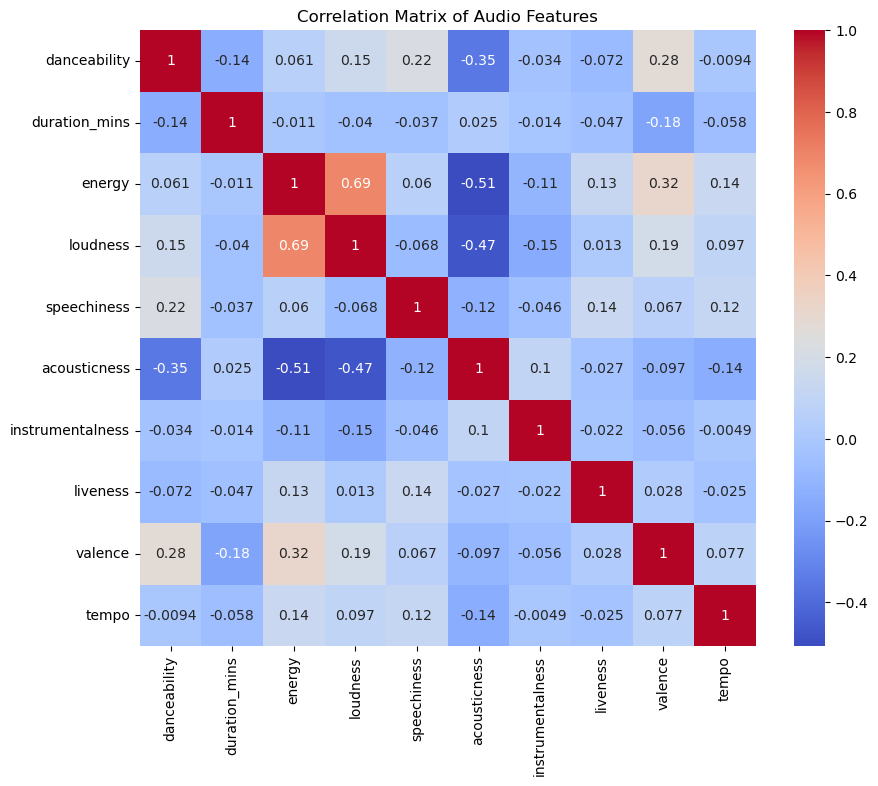

In [2]:
audio_features = ['danceability','duration_mins', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate the stream correlation matrix
feature_correlation_matrix = top10_clean[audio_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set chart title
plt.title('Correlation Matrix of Audio Features')

# Display the heatmap
plt.show()

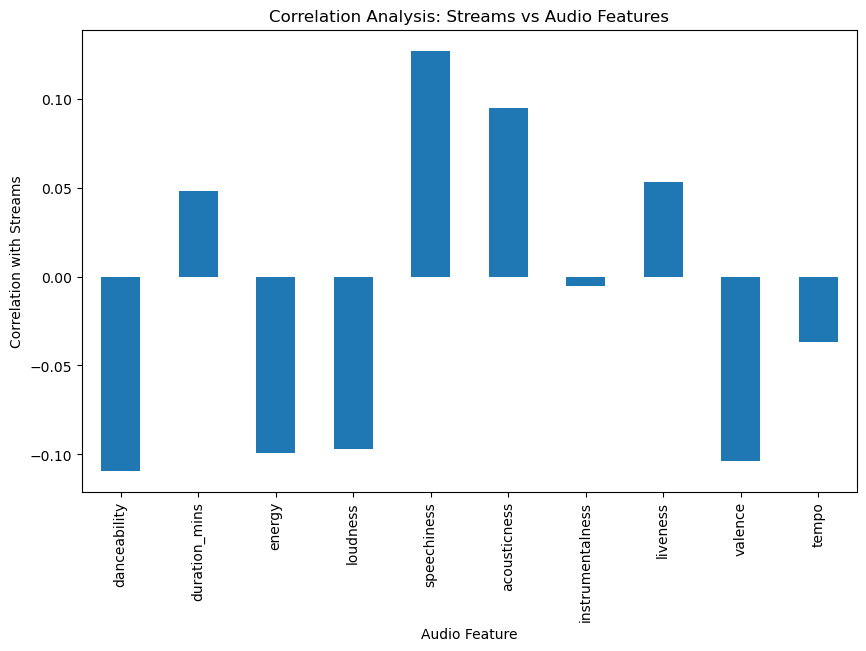

In [3]:


streams_correlation_matrix = top10_clean[audio_features].corrwith(top10_clean['streams'])
streams_correlation_matrix

plt.figure(figsize=(10, 6))
streams_correlation_matrix.plot(kind='bar')
plt.xlabel('Audio Feature')
plt.ylabel('Correlation with Streams')
plt.title('Correlation Analysis: Streams vs Audio Features')


plt.savefig('Output/Audio Features vs Streams.png', bbox_inches='tight')
plt.show()


Based on the correlation matrix above, here are some conclusions we can draw:

1. **Danceability:** There is a weak negative correlation (-0.109) between danceability and streams. This suggests that songs with lower danceability tend to be slightly more popular or streamed.

2. **Energy:** There is a weak negative correlation (-0.099) between energy and streams. This implies that songs with lower energy levels may be slightly more popular or streamed.

3. **Loudness:** There is a weak negative correlation (-0.097) between loudness and streams. This indicates that songs with lower loudness levels may have a slightly higher popularity or stream count.

4. **Speechiness:** There is a weak positive correlation (0.127) between speechiness and streams. This suggests that songs with higher levels of speechiness, such as spoken word or rap tracks, might be slightly more popular or streamed.

5. **Acousticness:** There is a weak positive correlation (0.095) between acousticness and streams. This implies that songs with higher acoustic elements may have a slight tendency to be more popular or streamed.

6. **Instrumentalness:** There is a very weak negative correlation (-0.005) between instrumentalness and streams. This indicates that there is almost no relationship between instrumentalness and the popularity or stream count of a song.

7. **Liveness:** There is a very weak positive correlation (0.053) between liveness and streams. This suggests that songs with higher liveness (recorded in a concert or live performance) may have a slight tendency to be more popular or streamed.

8. **Valence:** There is a weak negative correlation (-0.103) between valence and streams. This implies that songs with lower valence (more negative or sad emotions) might be slightly more popular or streamed.

9. **Tempo:** There is a weak negative correlation (-0.037) between tempo and streams. This suggests that songs with lower tempo (slower pace) may have a slight tendency to be more popular or streamed.

10. **Duration_mins:** There is a very weak positive correlation (0.048) between duration and streams. This indicates that there is almost no relationship between the duration of a song and its popularity or stream count.



Distribution of Track Features

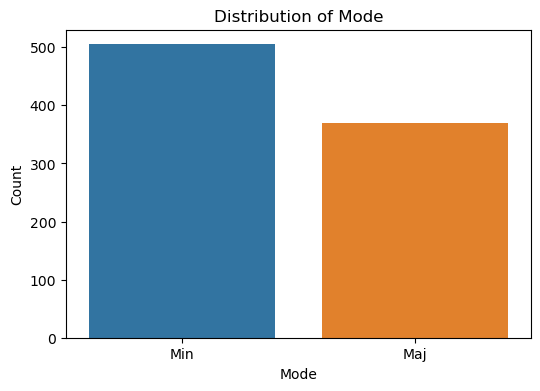

In [4]:
# Count the occurrences of each mode
mode_counts = top10_clean['mode'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=mode_counts.index, y=mode_counts.values)

# Set plot title and axis labels
plt.title('Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')

# Display the plot
plt.savefig('Output/Mode Distribution.png', bbox_inches='tight')
plt.show()


-   Music in minor keys was most popular

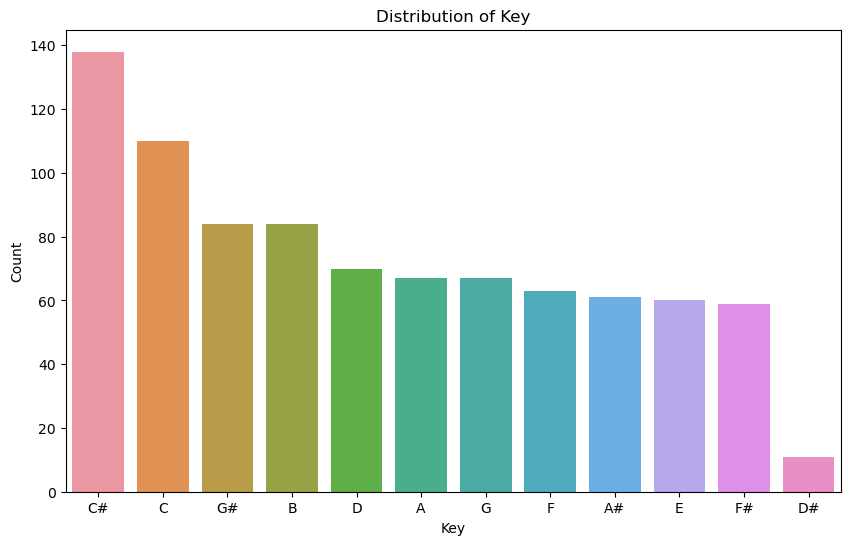

In [5]:
# Count the occurrences of each key
key_counts = top10_clean['key'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=key_counts.index, y=key_counts.values)

# Set plot title and axis labels
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.ylabel('Count')

# Display the plot
plt.savefig('Output/Key Distribution.png', bbox_inches='tight')
plt.show()


-   C# was the most popular key, D# was the least

In [8]:
# Extract the audio features
audio_features = ['danceability', 'duration_mins', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Plot and save each audio feature as a separate chart
for feature in audio_features:
    # Create a new figure and axes for each audio feature
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the distribution of the audio feature
    sns.kdeplot(data=top10_clean, x=feature, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    
    # Save the chart as a separate file
    filename = f'Output/{feature}_distribution.png'
    plt.savefig(filename, bbox_inches='tight')
    plt.close()  # Close the figure to release memory resources

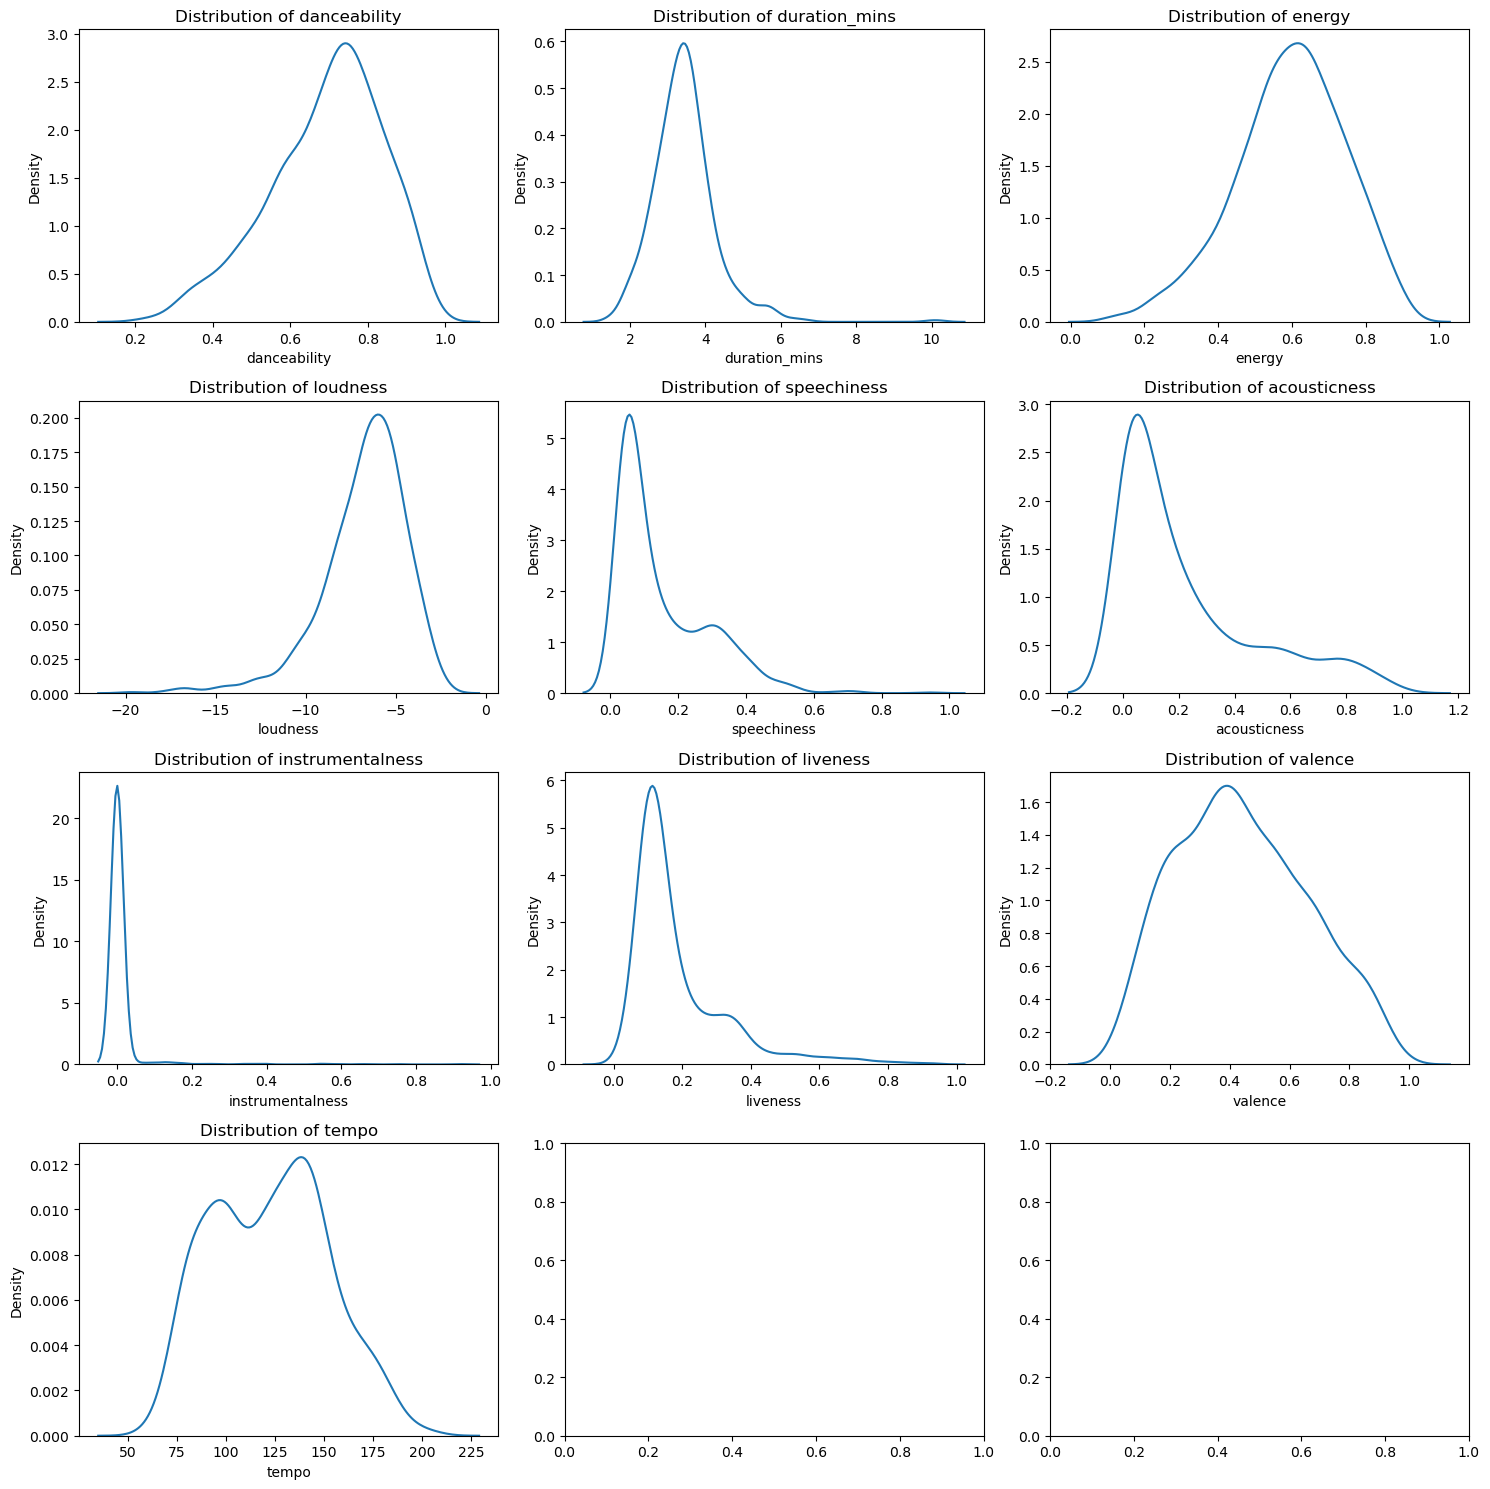

In [6]:
# Extract the audio features
audio_features = ['danceability','duration_mins', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create subplots for each audio feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Plot the distributions of audio features
for i, feature in enumerate(audio_features):
    row = i // 3
    col = i % 3
    sns.kdeplot(data=top10_clean, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)

plt.tight_layout()
plt.savefig('Output/Audio Features Distribution.png', bbox_inches='tight')

plt.show()


Features over Time

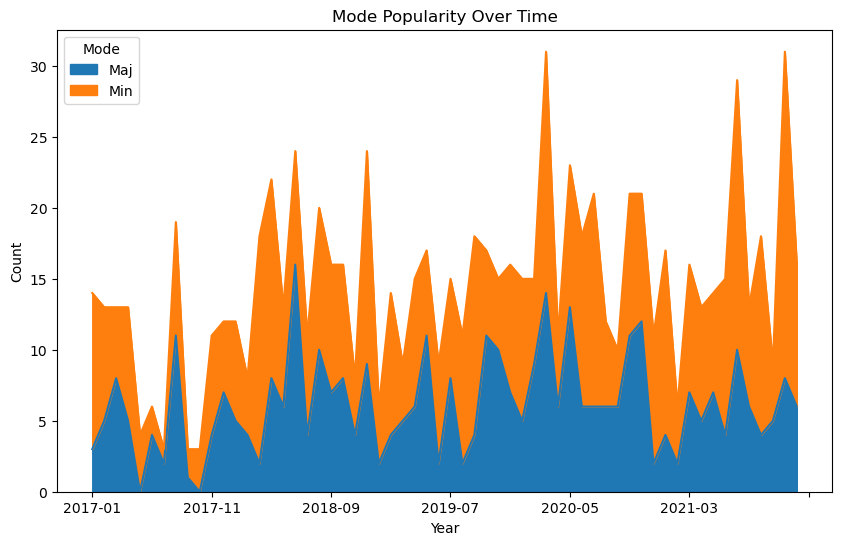

In [7]:
 #Group the data by year and mode, and calculate the count for each group
df_mode_counts = top10_clean.groupby(['month_year', 'mode']).size().reset_index(name='count')

# Pivot the data to create a separate column for each mode
df_pivot = df_mode_counts.pivot(index='month_year', columns='mode', values='count')

# Create a stacked area chart
df_pivot.plot(kind='area', stacked=True, figsize=(10, 6))

# Set chart title and labels
plt.title('Mode Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend
plt.legend(title='Mode')

# Display the chart
plt.savefig('Output/Mode Popularity over Time.png', bbox_inches='tight')
plt.show()#

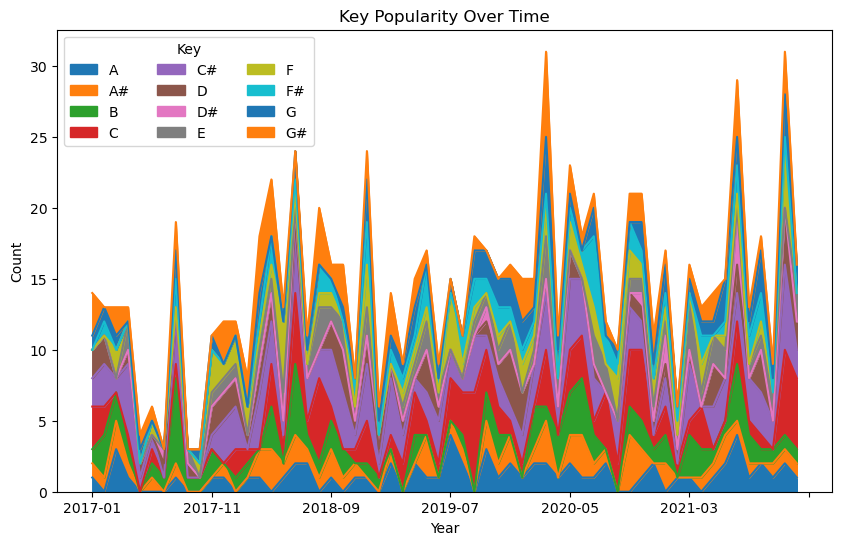

In [32]:
 #Group the data by year and mode, and calculate the count for each group
df_mode_counts = top10_clean.groupby(['month_year', 'key']).size().reset_index(name='count')

# Pivot the data to create a separate column for each mode
df_pivot = df_mode_counts.pivot(index='month_year', columns='key', values='count')

# Create a stacked area chart
df_pivot.plot(kind='area', stacked=True, figsize=(10, 6))

# Set chart title and labels
plt.title('Key Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend
plt.legend(title='Key', loc= 'upper left', ncol=len(df_mode_counts.columns))

# Display the chart
plt.savefig('Output/Key Popularity over Time.png', bbox_inches='tight')
plt.show()#

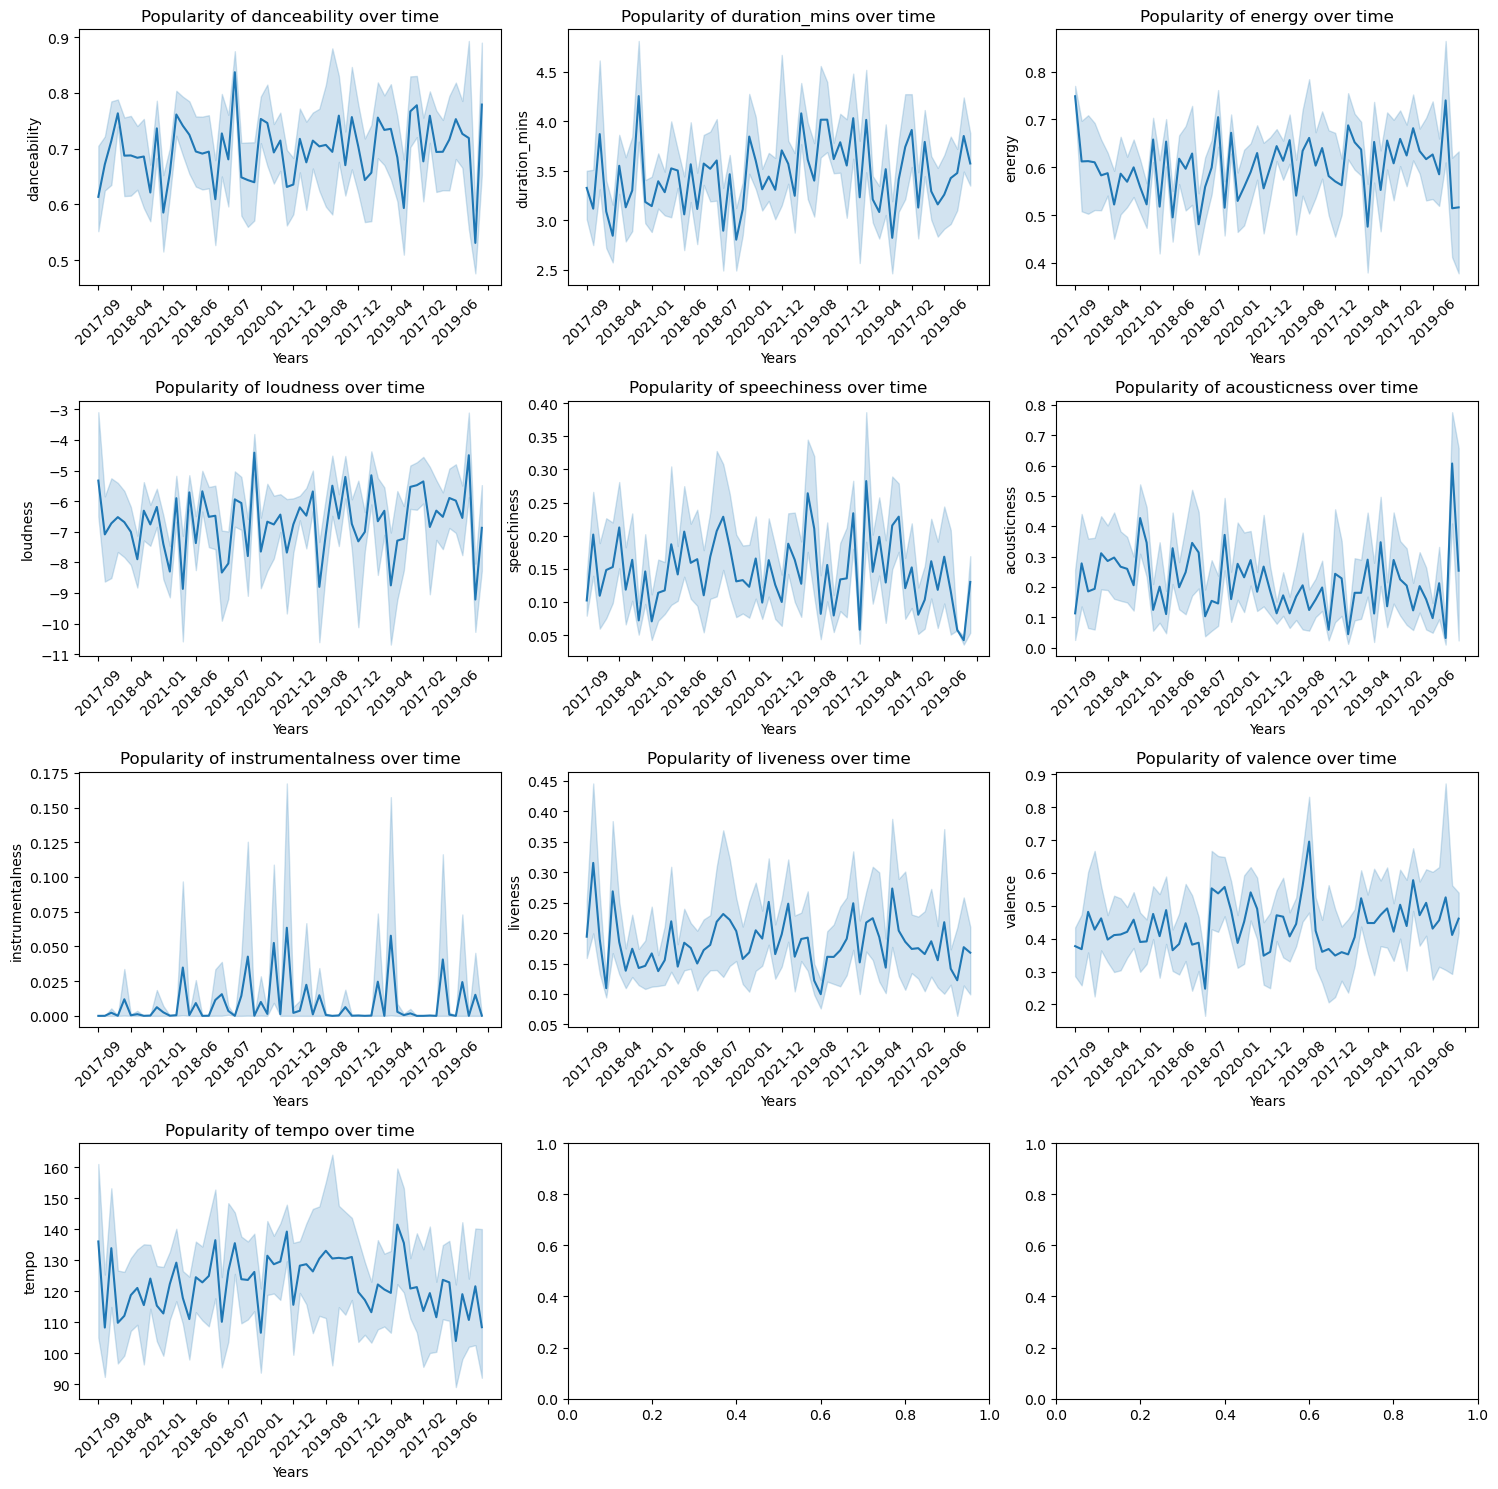

In [8]:
# Define the audio features
audio_features = ['danceability', 'duration_mins' ,'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create subplots for each audio feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Plot the distribution of each audio feature over time
for i, feature in enumerate(audio_features):
    row = i // 3
    col = i % 3
    ax = sns.lineplot(data=top10_clean, x='month_year', y=feature, ax=axes[row, col])
    ax.set_title(f'Popularity of {feature} over time')
    ax.set_xlabel('Years')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number of ticks as needed

plt.tight_layout()
plt.savefig('Output/Audio Features Popularity over Time.png', bbox_inches='tight')
plt.show()


Magic Sauce - What features does a track need to have to make it to the Top 10?

- Need at least this many streams

In [9]:
minimum_value = top10_clean['streams'].min()
print("Minimum Streams:", minimum_value)

Minimum Streams: 565606.0


-   Minimum Requirements of Audio Features that made songs popular

In [10]:
# Filter the dataset to include only entries with at least the minumum streams 
over_minimum_streams = top10_clean[top10_clean['streams'] > minimum_value]

# Calculate the minimum values for each audio feature
min_audio_feature_values =over_minimum_streams[audio_features].min()

print("Minimum Values for a New Entry to be at least as popular as the top 10 tracks:")
print(min_audio_feature_values)


Minimum Values for a New Entry to be at least as popular as the top 10 tracks:
danceability         0.218000
duration_mins        1.420000
energy               0.111000
loudness           -19.697000
speechiness          0.024800
acousticness         0.000248
instrumentalness     0.000000
liveness             0.021500
valence              0.032000
tempo               58.000000
dtype: float64


-   Combination of Audio Features that produced the most streams

In [11]:
# Calculate the total streams for each combination of audio features
top10_clean['total_streams'] = top10_clean['streams']
for feature in audio_features:
    top10_clean['total_streams'] *= top10_clean[feature]

# Find the combination with the highest stream count
max_streams_index = np.argmax(top10_clean['total_streams'])
max_streams_combination = top10_clean.loc[max_streams_index, audio_features]

print("Combination of Audio Features with the Most Streams:")
print(max_streams_combination)

Combination of Audio Features with the Most Streams:
danceability         0.616
duration_mins         3.47
energy                0.77
loudness              -6.5
speechiness          0.142
acousticness        0.0573
instrumentalness       0.0
liveness             0.159
valence              0.412
tempo                  161
Name: 0, dtype: object
